In [1]:
import requests
from dotenv import load_dotenv
import os 
import pandas as pd
import numpy as np
import alpaca_trade_api as tradeapi
import json
import matplotlib.pyplot as plt
from pathlib import Path

load_dotenv()

True

In [2]:
alpaca_api_key = os.getenv("alpaca_api_key")
alpaca_secret_key = os.getenv("alpaca_secret_key")

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version= "v2")

In [3]:
current_date = pd.Timestamp("2021-01-01", tz="America/New_York").isoformat()
tickers = ["MSFT", "UPS", "WMT", "FDX", "ECL", "CCI", "CAT", "WM", "AAPL", "CNI"]
timeframe = "1D"

df_ticker = alpaca.get_barset(tickers, timeframe,start=current_date).df

close_prices_df = pd.DataFrame()

for ticker in tickers:
        close_prices_df[ticker] = df_ticker[ticker]['close']

close_prices_df

,MSFT,UPS,WMT,FDX,ECL,CCI,CAT,WM,AAPL,CNI
time,,,,,,,,,,
2021-01-04 00:00:00-05:00,217.81,163.80,146.51,253.29,214.19,155.00,182.20,114.84,129.41,109.58
2021-01-05 00:00:00-05:00,218.01,161.57,145.74,253.18,216.68,155.66,183.64,115.28,130.95,110.97
2021-01-06 00:00:00-05:00,212.22,161.04,146.68,253.56,225.61,151.43,194.02,117.79,126.58,112.96
2021-01-07 00:00:00-05:00,218.29,158.94,146.65,246.12,225.74,152.52,194.23,118.07,130.85,113.73
2021-01-08 00:00:00-05:00,219.55,158.40,146.63,245.01,221.75,154.02,194.18,118.61,131.99,116.03
...,...,...,...,...,...,...,...,...,...,...
2021-05-17 00:00:00-04:00,245.18,216.37,138.93,309.02,221.65,182.00,244.83,141.52,126.26,108.48
2021-05-18 00:00:00-04:00,243.02,213.99,141.87,306.06,217.96,182.77,239.47,140.49,124.85,108.43
2021-05-19 00:00:00-04:00,243.14,214.36,141.94,308.03,213.43,181.85,236.84,139.17,124.69,106.44


In [4]:
daily_returns = close_prices_df.pct_change().dropna()

correlation = daily_returns.corr()

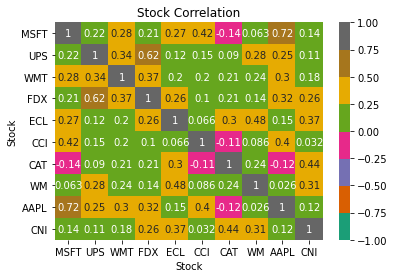

In [5]:
import seaborn as sns

def correlation_map(dataframe):
    stock_corr_plot = sns.heatmap(dataframe, vmin = -1, vmax = 1, cmap = "Dark2", annot= True)
    stock_corr_plot.set(
    xlabel = "Stock", 
    ylabel = "Stock",
    title = "Stock Correlation")

correlation_map(correlation)

In [6]:
portfolio_mean = daily_returns.mean()

portfolio_returns = daily_returns.sum()

In [7]:
#Portfolio Base will always be evenly distributed

portfolio_weights = [.1,.1,.1,.1,.1,.1,.1,.1,.1,.1]

In [8]:
#The Base Portfolio will give the total portfolio change per day

daily_returns["Base Portfolio"] = daily_returns.dot(portfolio_weights)

In [9]:
portfolio_total_return = daily_returns["Base Portfolio"].sum()

In [10]:
Portfolio_1 = daily_returns["Base Portfolio"]
Portfolio_1 = pd.DataFrame(Portfolio_1)

## Beginning New Portfolio

In [11]:
#Dropping the column of first portfolio
daily_returns.drop(daily_returns.columns[[-1]], axis=1, inplace=True)

In [12]:
portfolio2_weights = [.4, .05, .073, .036, .039, .047, .076, .095, .101, .083]
sum(portfolio2_weights)

1.0

In [13]:
daily_returns["Portfolio 2"] = daily_returns.dot(portfolio2_weights)

In [14]:
Portfolio_2 = daily_returns["Portfolio 2"]
Portfolio_2 = pd.DataFrame(Portfolio_2)

In [15]:
p1_and_p2 = pd.concat([Portfolio_1,Portfolio_2],axis=1)
p1_and_p2

,Base Portfolio,Portfolio 2
time,,
2021-01-05 00:00:00-05:00,0.003382,0.003160
2021-01-06 00:00:00-05:00,0.005501,-0.005450
2021-01-07 00:00:00-05:00,0.003780,0.014359
2021-01-08 00:00:00-05:00,0.002314,0.004713
2021-01-11 00:00:00-05:00,-0.004452,-0.007732
...,...,...
2021-05-17 00:00:00-04:00,-0.001204,-0.004693
2021-05-18 00:00:00-04:00,-0.006144,-0.006846
2021-05-19 00:00:00-04:00,-0.005668,-0.003875


In [16]:
total_returns = p1_and_p2.sum()
print(total_returns)

Base Portfolio    0.122845
Portfolio 2       0.117107
dtype: float64


In [17]:
import plotly.express as px

In [18]:
bar_returns = px.bar(total_returns, range_y= (-.01,.3),title="Portfoli0 Returns", labels={"value":"Return Percentage", "index":"Portfolio"}, width=(500), height=(600))
bar_returns

<AxesSubplot:xlabel='time'>

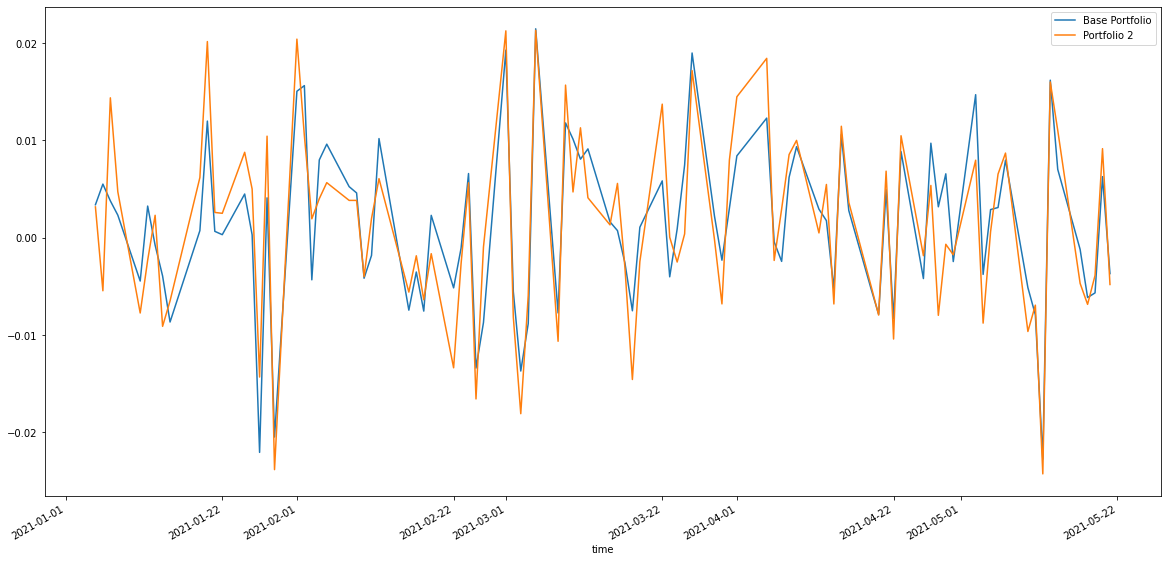

In [24]:
p1_and_p2.plot(figsize=(20,10))